In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

In [2]:
with Path("/Users/nils/Documents/repos/MQTBench/evaluation_data.pkl").open("rb") as f:
    eval_data = pickle.load(f)
eval_data = np.array(eval_data)

In [3]:
(
    benchmarks,
    num_qubits,
    depth,
    num_all_gates,
    num_nonlocal_gates,
    program_communication,
    critical_depth,
    entanglement_ratio,
    parallelism,
    liveness,
) = [eval_data[:, i] for i in range(len(eval_data[0]))]

# Num Qubits

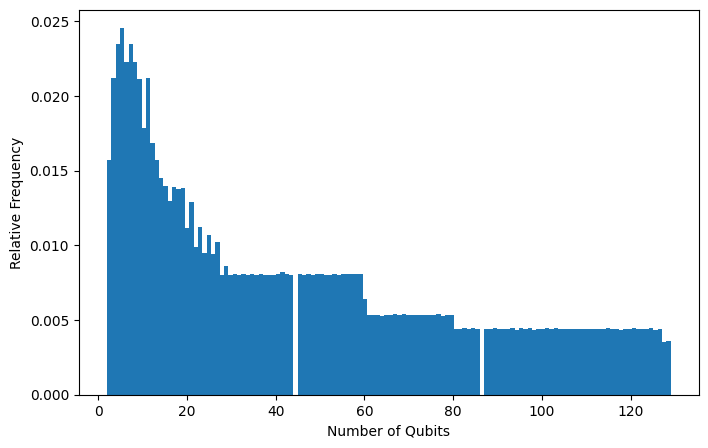

In [4]:
plt.figure(figsize=(8, 5))
plt.hist(num_qubits, weights=np.zeros_like(num_qubits) + 1.0 / num_qubits.size, bins=130)
plt.ylabel("Relative Frequency")
plt.xlabel("Number of Qubits")
plt.savefig("eval_results/num_qubits.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Depth

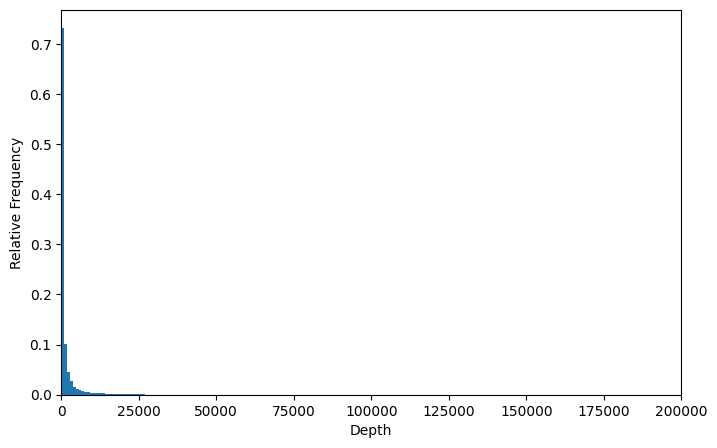

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(depth, weights=np.zeros_like(depth) + 1.0 / depth.size, bins=10000)
plt.ylabel("Relative Frequency")
plt.xlabel("Depth")
plt.xlim(0, 200000)
plt.savefig("eval_results/depth.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Num Gates

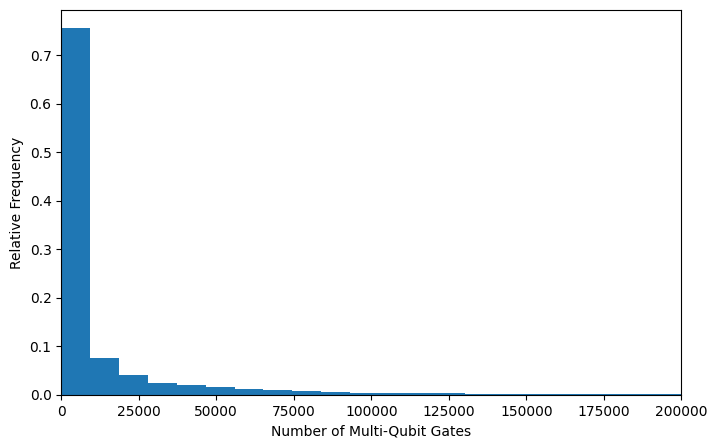

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(num_all_gates, weights=np.zeros_like(num_all_gates) + 1.0 / num_all_gates.size, bins=1000)
plt.ylabel("Relative Frequency")
plt.xlabel("Number of Multi-Qubit Gates")
plt.savefig("eval_results/num_all_gates.pdf", format="pdf", bbox_inches="tight")
plt.xlim(0, 200000)
plt.show()

# Num Multi-Qubit Gates

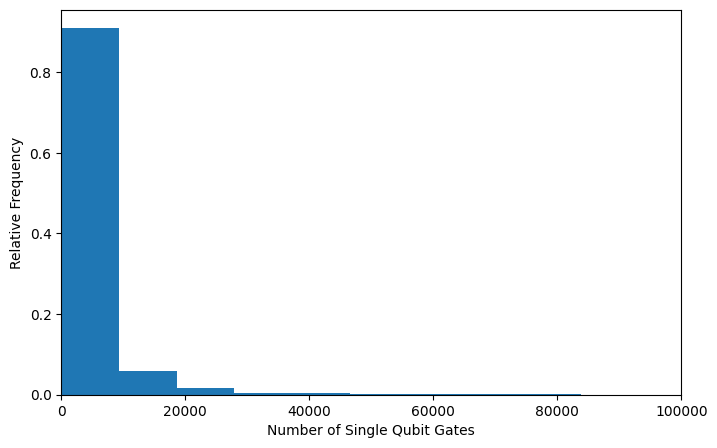

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(num_nonlocal_gates, weights=np.zeros_like(num_nonlocal_gates) + 1.0 / num_nonlocal_gates.size, bins=1000)
plt.ylabel("Relative Frequency")
plt.xlabel("Number of Single Qubit Gates")
plt.savefig("eval_results/num_nonlocal_gates.pdf", format="pdf", bbox_inches="tight")
plt.xlim(0, 100000)
plt.show()

# Percentage Multi-Qubit Gates

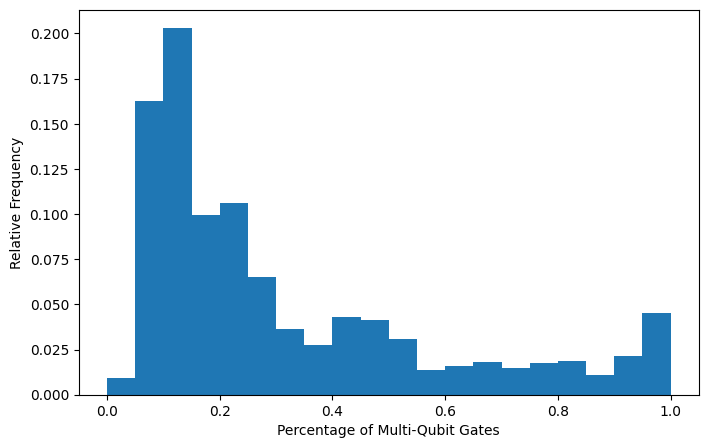

In [8]:
plt.figure(figsize=(8, 5))
perc_multi = num_nonlocal_gates / num_all_gates
plt.hist(perc_multi, weights=np.zeros_like(perc_multi) + 1.0 / perc_multi.size, bins=20)
plt.ylabel("Relative Frequency")
plt.xlabel("Percentage of Multi-Qubit Gates")
plt.savefig("eval_results/a.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Program Communication

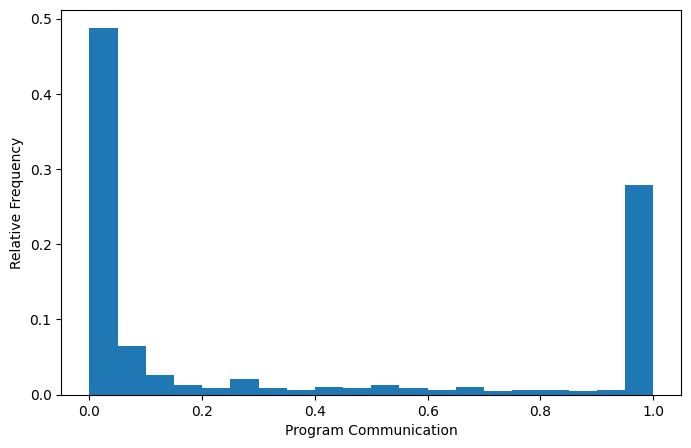

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(
    program_communication, weights=np.zeros_like(program_communication) + 1.0 / program_communication.size, bins=20
)
plt.ylabel("Relative Frequency")
plt.xlabel("Program Communication")
plt.savefig("eval_results/program_communication.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Critical Depth

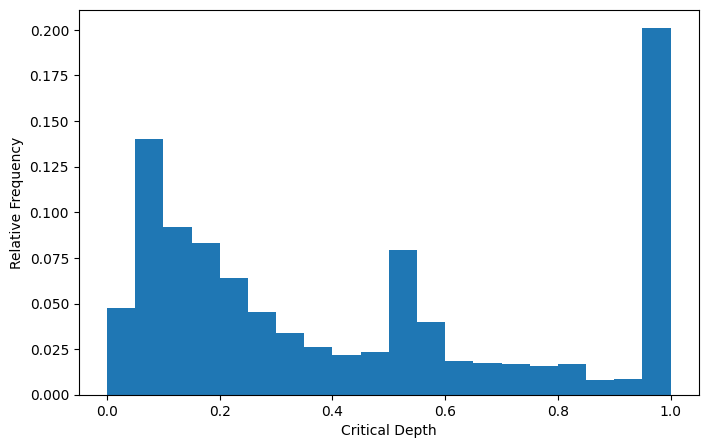

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(critical_depth, weights=np.zeros_like(critical_depth) + 1.0 / critical_depth.size, bins=20)
plt.ylabel("Relative Frequency")
plt.xlabel("Critical Depth")
plt.savefig("eval_results/critical_depth.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Entanglement Ratio

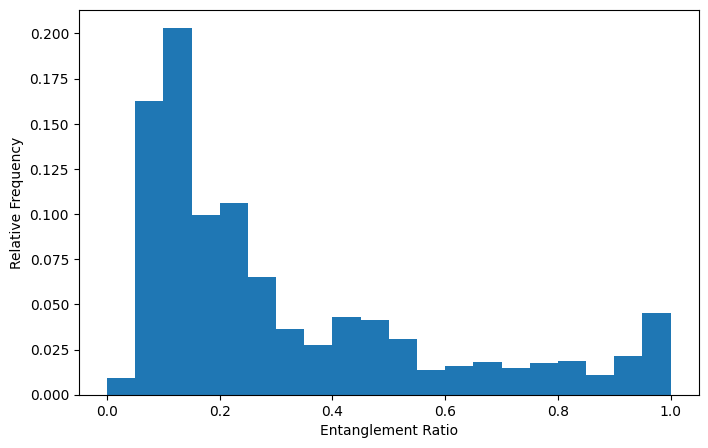

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(entanglement_ratio, weights=np.zeros_like(entanglement_ratio) + 1.0 / entanglement_ratio.size, bins=20)
plt.ylabel("Relative Frequency")
plt.xlabel("Entanglement Ratio")
plt.savefig("eval_results/entanglement_ratio.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Parallelism

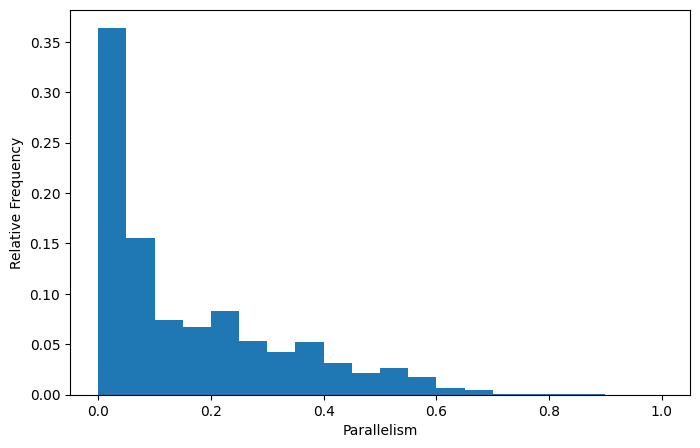

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(parallelism, weights=np.zeros_like(parallelism) + 1.0 / parallelism.size, bins=20)
plt.ylabel("Relative Frequency")
plt.xlabel("Parallelism")
plt.savefig("eval_results/parallelism.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Liveness

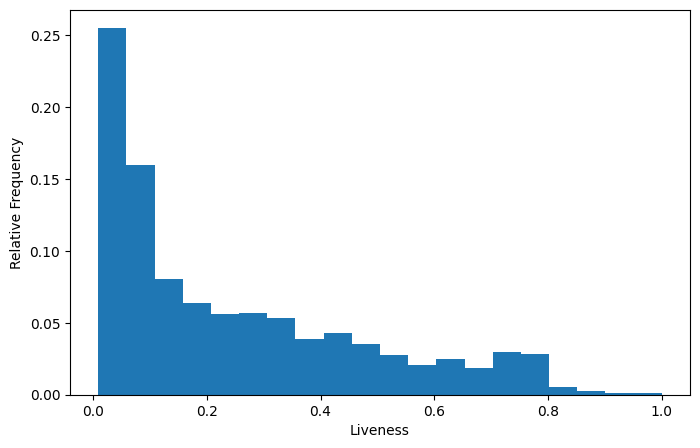

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(liveness, weights=np.zeros_like(liveness) + 1.0 / liveness.size, bins=20)
plt.ylabel("Relative Frequency")
plt.xlabel("Liveness")
plt.savefig("eval_results/liveness.pdf", format="pdf", bbox_inches="tight")
plt.show()

# All Supermarq Features in one plot

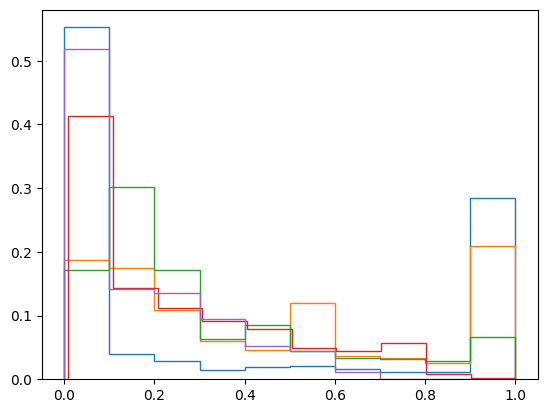

In [14]:
plt.hist(
    program_communication,
    weights=np.zeros_like(program_communication) + 1.0 / program_communication.size,
    bins=10,
    histtype="step",
)
plt.hist(critical_depth, weights=np.zeros_like(critical_depth) + 1.0 / critical_depth.size, bins=10, histtype="step")
plt.hist(
    entanglement_ratio,
    weights=np.zeros_like(entanglement_ratio) + 1.0 / entanglement_ratio.size,
    bins=10,
    histtype="step",
)
plt.hist(liveness, weights=np.zeros_like(liveness) + 1.0 / liveness.size, bins=10, histtype="step")
plt.hist(parallelism, weights=np.zeros_like(parallelism) + 1.0 / parallelism.size, bins=10, histtype="step")
plt.show()

In [34]:
datasets = [
    perc_multi.astype(float),
    program_communication.astype(float),
    critical_depth.astype(float),
    entanglement_ratio.astype(float),
    liveness.astype(float),
    parallelism.astype(float),
]
labels = [
    "Percentage Multi-Qubit Gates",
    "Program Communication",
    "Critical Depth",
    "Entanglement Ratio",
    "Liveness",
    "Parallelism",
]

[Text(0, 0, 'Percentage Multi-Qubit Gates'),
 Text(1, 0, 'Program Communication'),
 Text(2, 0, 'Critical Depth'),
 Text(3, 0, 'Entanglement Ratio'),
 Text(4, 0, 'Liveness'),
 Text(5, 0, 'Parallelism')]

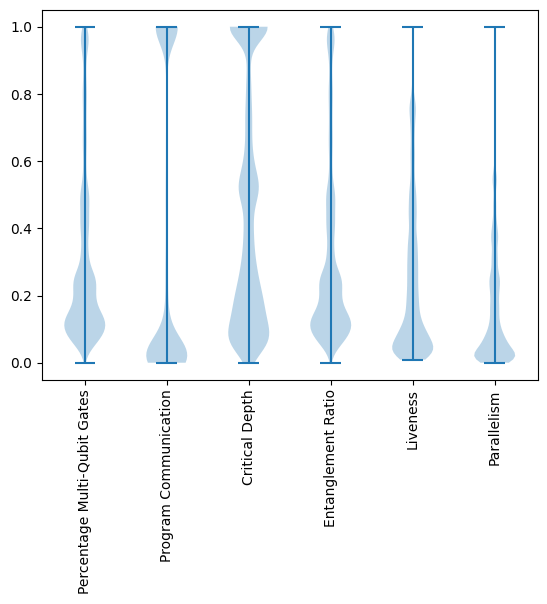

In [36]:
fig = plt.figure()  # Create a new figure for getting axis
ax = fig.add_subplot(111)
pos = range(len(datasets))
plt.violinplot(datasets, pos)
ax.set_xticks(pos)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)